Somativa IABD - Cauã Victor de Moura

In [85]:
# Importação das bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from mpl_toolkits.mplot3d import Axes3D
from sklearn.metrics import silhouette_score


In [86]:
dados = pd.read_csv('dadosacoes.csv')


In [87]:
# Preparação dos dados

# Importação das bibliotecas
import pandas as pd

# Carregamento do arquivo CSV
dados = pd.read_csv('dadosacoes.csv')

# Exibição das primeiras linhas do dataset para verificar a estrutura
print("Primeiras linhas do dataset:")
print(dados.head())

# Confirmando as colunas
print("\nColunas presentes no dataset:")
print(dados.columns)


Primeiras linhas do dataset:
  nome ação  preço ação R$  qtde cotas  valor de mercado R$ -(Bilhões)
0     VALE3            194          45                            2134
1     SUZB3             91          71                            3069
2     SUZB3            165          41                            2815
3     SUZB3             56          34                            3613
4    GOOGLE            212           9                            2975

Colunas presentes no dataset:
Index(['nome ação', 'preço ação R$', 'qtde cotas',
       'valor de mercado R$ -(Bilhões)'],
      dtype='object')


C:\Users\dsadm\AppData\Local\Temp\ipykernel_22684\2638656812.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=dados, x='nome ação', y='preço ação R$', palette='Set2')


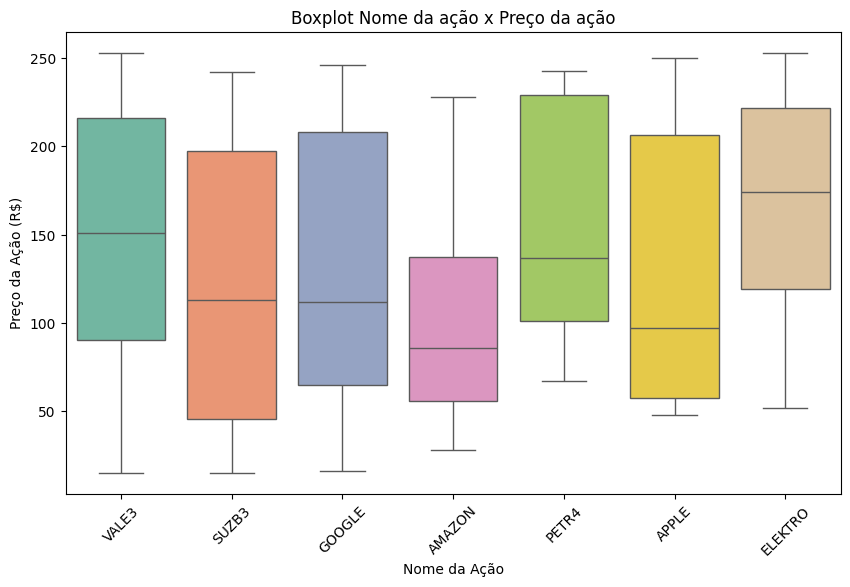

In [88]:
# 2a) Boxplot do preço da ação para cada ativo
plt.figure(figsize=(10, 6))
sns.boxplot(data=dados, x='nome ação', y='preço ação R$', palette='Set2')
plt.title('Boxplot Nome da ação x Preço da ação')
plt.xlabel('Nome da Ação')
plt.ylabel('Preço da Ação (R$)')
plt.xticks(rotation=45)
plt.show()

C:\Users\dsadm\AppData\Local\Temp\ipykernel_22684\3560680592.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=dados, x='nome ação', y='valor de mercado R$ -(Bilhões)', palette='Set1')


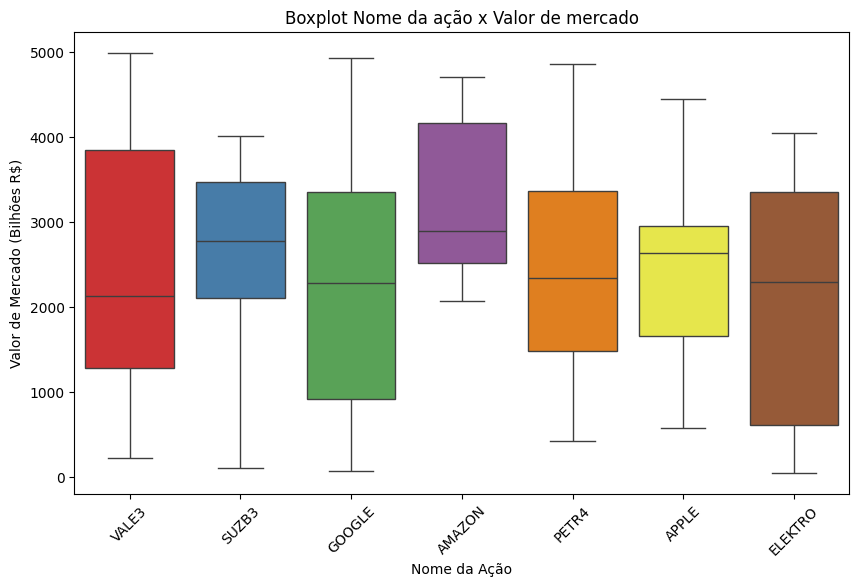

In [89]:
# 2a) Boxplot do valor de mercado para cada ativo
plt.figure(figsize=(10, 6))
sns.boxplot(data=dados, x='nome ação', y='valor de mercado R$ -(Bilhões)', palette='Set1')
plt.title('Boxplot Nome da ação x Valor de mercado')
plt.xlabel('Nome da Ação')
plt.ylabel('Valor de Mercado (Bilhões R$)')
plt.xticks(rotation=45)
plt.show()

In [90]:
# 2b) Informações gerais do dataset
print("Informações do conjunto de dados:")
print(dados.info())

Informações do conjunto de dados:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   nome ação                       100 non-null    object
 1   preço ação R$                   100 non-null    int64 
 2   qtde cotas                      100 non-null    int64 
 3   valor de mercado R$ -(Bilhões)  100 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 3.3+ KB
None


In [91]:
# 2c) Estatísticas do conjunto de dados
print("\n Descrição do conjunto de dados:")
print(dados.describe())


 Descrição do conjunto de dados:
       preço ação R$  qtde cotas  valor de mercado R$ -(Bilhões)
count     100.000000  100.000000                       100.00000
mean      136.140000   52.010000                      2433.70000
std        75.237942   27.475791                      1397.29373
min        15.000000    2.000000                        52.00000
25%        67.000000   28.250000                      1189.25000
50%       121.500000   55.500000                      2433.00000
75%       209.000000   76.500000                      3616.50000
max       253.000000   97.000000                      4993.00000


In [92]:
# Pré-processamento: Lidar com valores ausentes.
dados.dropna(inplace=True)

In [93]:
# Pré-processamento: Codificação de variáveis categóricas
if 'nome ação' in dados.columns:
    dados = pd.get_dummies(dados, columns=['nome ação'], drop_first=True)

In [94]:
# Selecionando as características 
caracteristicas = ['preço ação R$', 'qtde cotas', 'valor de mercado R$ -(Bilhões)']
scaler = StandardScaler()
dados_scaled = scaler.fit_transform(dados[caracteristicas])

In [95]:
# 4) Utilização do K-Means com n_clusters= 4
kmeans = KMeans(n_clusters=4, random_state=42)
dados['cluster_4'] = kmeans.fit_predict(dados_scaled)

In [96]:
# 4a) Alterando para 5 clusters
kmeans_5 = KMeans(n_clusters=5, random_state=42)
dados['cluster_5'] = kmeans_5.fit_predict(dados_scaled)

In [97]:
# 4b) Alterando para 8 clusters
kmeans_8 = KMeans(n_clusters=8, random_state=42)
dados['cluster_8'] = kmeans_8.fit_predict(dados_scaled)


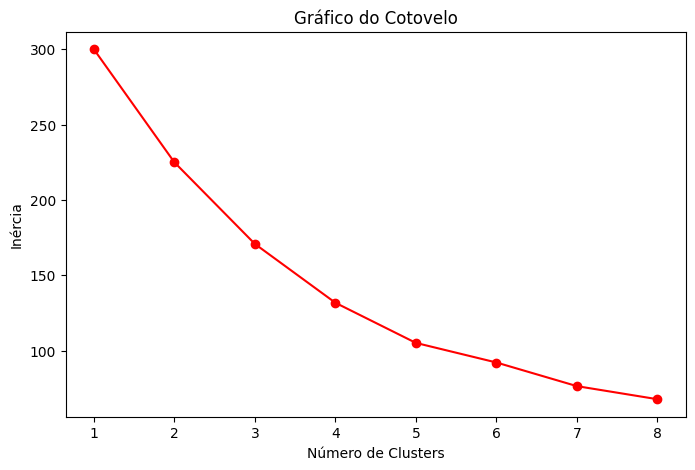

In [98]:
# 4c) Plotando gráfico do cotovelo
inertia = []
range_clusters = range(1, 9)
for k in range_clusters:
    kmeans_temp = KMeans(n_clusters=k, random_state=42)
    kmeans_temp.fit(dados_scaled)
    inertia.append(kmeans_temp.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(range_clusters, inertia, marker='o', color='red')
plt.title('Gráfico do Cotovelo')
plt.xlabel('Número de Clusters')
plt.ylabel('Inércia')
plt.show()

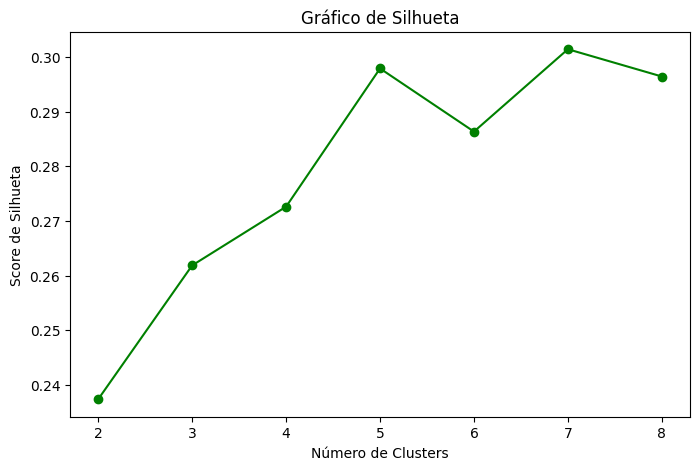

In [99]:
# 4d) Plotando gráfico de silhueta
silhouette_scores = []
for k in range(2, 9):  
    kmeans_temp = KMeans(n_clusters=k, random_state=42)
    labels = kmeans_temp.fit_predict(dados_scaled)
    silhouette_scores.append(silhouette_score(dados_scaled, labels))

plt.figure(figsize=(8, 5))
plt.plot(range(2, 9), silhouette_scores, marker='o', color='green')
plt.title('Gráfico de Silhueta')
plt.xlabel('Número de Clusters')
plt.ylabel('Score de Silhueta')
plt.show()

In [100]:
# 5 - Visualizando clusters formados
# 5a) Visualização 2D
plt.figure(figsize=(10, 6))
sns.scatterplot(data=dados, x='preço ação R$', y='valor de mercado R$ -(Bilhões)', hue='cluster', palette='viridis')
plt.title('Formação de Clusters (2D)')
plt.xlabel('Preço da Ação (R$)')
plt.ylabel('Valor de Mercado (Bilhões R$)')
plt.legend(title='Cluster')
plt.show()

ValueError: Could not interpret value `cluster` for `hue`. An entry with this name does not appear in `data`.

<Figure size 1000x600 with 0 Axes>

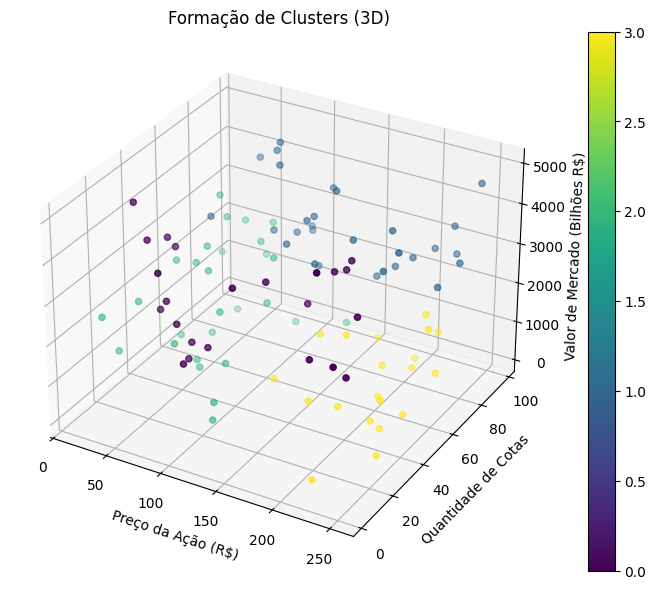

In [ ]:
# 5b) Visualização 3D

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(
    dados['preço ação R$'], 
    dados['qtde cotas'], 
    dados['valor de mercado R$ -(Bilhões)'], 
    c=dados['cluster'], 
    cmap='viridis'
)
ax.set_title('Formação de Clusters (3D)')
ax.set_xlabel('Preço da Ação (R$)')
ax.set_ylabel('Quantidade de Cotas')
ax.set_zlabel('Valor de Mercado (Bilhões R$)')
plt.colorbar(scatter)
plt.show()

5- Qual a maior vantagem do aprendizado não suprevisionado diante o aprendizado supervisionado? 


A principal vantagem do aprendizado não supervisionado é que ele consegue identificar padrões e agrupamentos nos dados sem precisar de informações ou rótulos prontos. Isso é ótimo quando estamos lidando com dados desconhecidos ou complexos, como quando tentamos entender o comportamento de clientes ou detectar algo fora do comum. Além disso, técnicas como a redução de dimensionalidade ajudam a simplificar grandes volumes de dados, destacando o que realmente importa, sem sobrecarregar o modelo. Já o aprendizado supervisionado depende de dados rotulados, o que o torna mais limitado quando não temos essas informações disponíveis.